In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from scipy import interpolate

from scipy.ndimage.filters import gaussian_filter1d

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.image as mpimg 
from matplotlib import patheffects

import seaborn as sns

%matplotlib inline


In [2]:
import numpy as np

In [12]:
original_atmos = pd.read_csv("data_redo/transmittance-3.csv", header=None, names=['wavelength', 'atmos']).sort_values(by='wavelength')

In [4]:
original_snow = pd.read_csv("data_redo/snow-combined.csv", header=None, names=['wavelength', 'reflect_snow']).sort_values(by='wavelength')

In [5]:
original_rock = pd.read_csv("data_redo/dirt-combined.csv", header=None, names=['wavelength', 'reflect_rock']).sort_values(by='wavelength')

In [6]:
original_veg = pd.read_csv("data_redo/veg-combined.csv", header=None, names=['wavelength', 'reflect_veg']).sort_values(by='wavelength')

In [7]:
original_veg = original_veg.drop(index=12)

In [8]:
original_veg.reflect_veg = original_veg.reflect_veg * 100
original_snow.reflect_snow = original_snow.reflect_snow * 100
original_rock.reflect_rock = original_rock.reflect_rock * 100

In [77]:
veg_interp = interpolate.interp1d(original_veg.wavelength, original_veg.reflect_veg, kind='cubic')
snow_interp = interpolate.interp1d(original_snow.wavelength, original_snow.reflect_snow, kind='linear')
rock_interp = interpolate.interp1d(original_rock.wavelength, original_rock.reflect_rock, kind='linear')


In [99]:
veg_smooth = interpolate.make_interp_spline(original_veg.wavelength, original_veg.reflect_veg, k=3)
snow_smooth = interpolate.make_interp_spline(original_snow.wavelength, original_snow.reflect_snow, k=2)
rock_smooth = interpolate.make_interp_spline(original_rock.wavelength, original_rock.reflect_rock, k=2)
atmos_smooth = interpolate.make_interp_spline(original_atmos.wavelength, original_atmos.atmos, k=5)

ValueError: Expect x to be a 1-D sorted array_like.

array([32.36010259, 31.74123434, 30.46193647, ...,  6.82567785,
        6.02020431,  5.54440031])

In [79]:
dove_image = mpimg.imread("dove.png")

In [9]:
band_height = 6
MODIS_loc = 72
PLANET_loc = 43
SENTINEL_loc = 58
SENTINEL_20m_loc = 20

MODIS_BANDS = [
    (1, 0.62, 0.67-0.62),
    (2, 0.841, 0.876 - 0.841),
    (3, 0.459, 0.479-0.459),
    (4, 0.545, 0.565-0.545), 
    (5, 1.230, 1.250 - 1.230),
    (6, 1.628, 1.652-1.628),
    (7, 2.105, 2.155-2.105)
]
modis_rects = [
    patches.Rectangle((b[1], MODIS_loc), width=b[2], height=band_height) for b in MODIS_BANDS
]


PLANET_BANDS = [
    (1, 0.45, 0.515-0.45),
    (2, 0.5, 0.59-0.5),
    (3, 0.59, 0.670-0.59),
    (4, 0.78, 0.86-0.78)
]

planet_rects = [
    patches.Rectangle((b[1], PLANET_loc), width=b[2], height=band_height, edgecolor='black', facecolor='none', fill=None, linewidth=0.2) for b in PLANET_BANDS
]

SENTINEL_BANDS = [
    (2, (0.4924 - 0.066/2), 0.066), 
    (3, (0.5598 - 0.036/2), 0.036), 
    (4, (0.6646 - 0.031/2),  0.031), 
    (8, (0.8328 - 0.106/2),  0.106)
]

sentinel_rects = [
    patches.Rectangle((b[1], SENTINEL_loc), width=b[2], height=band_height, edgecolor='black', facecolor='none', fill=None, linewidth=0.2) for b in SENTINEL_BANDS
]
sentinel_rects_max_x = max([i.get_x() + i.get_width() for i in sentinel_rects])

SENTINEL_20M = [
    (5, (0.7041 - 0.015/2), 0.015),
    (6, (0.7405 - 0.015/2), 0.015),
    (7, (0.7828 - 0.020/2), 0.020),
    ('8a', (0.8647 - 0.021/2), 0.021),
    (11, (1.1637 - 0.091/2), 0.091),
#     (12, (2.2024 - 0.175/2), 2.2024)

]
sentinel_20m_rects = [
    patches.Rectangle((b[1], SENTINEL_20m_loc), width=b[2], height=band_height, edgecolor='black', facecolor='none', fill=None, linewidth=0.2) for b in SENTINEL_20M
]

sentinel_20m_rects_max_x = max([i.get_x() + i.get_width() for i in sentinel_20m_rects])


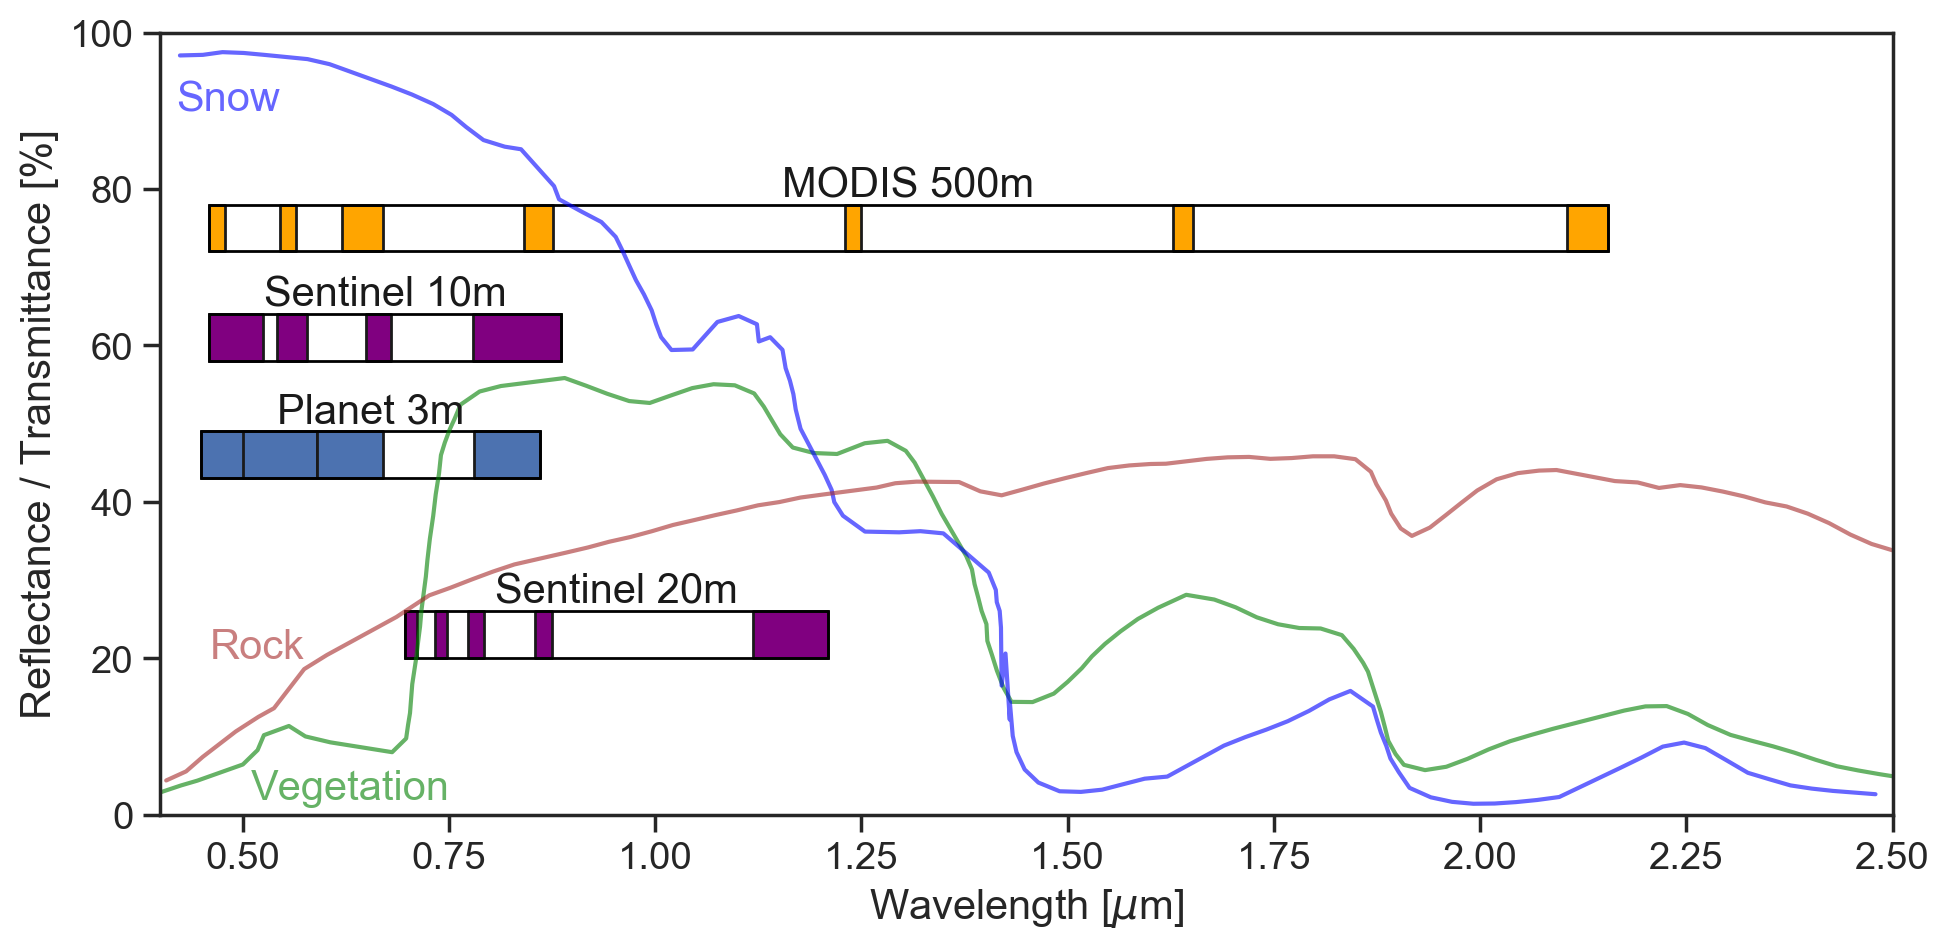

In [41]:
sns.set(font_scale=1.25, style='ticks')
linealpha = 0.6

path_effects = [patheffects.Stroke(linewidth=1., foreground='white'),
        patheffects.Normal()]
X = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

# ax.plot(original_veg.wavelength, original_veg.reflect_veg, color='green')
# ax.plot(X, veg_smooth(X), color='green')
# ax.plot(X, snow_smooth(X), color='blue')
# ax.plot(X, rock_smooth(X), color='brown')
# ax.plot(X, atmos_smooth(X), color='black', linestyle='--', linewidth=0.6)
ax.plot(original_veg.wavelength, original_veg.reflect_veg, color='green', alpha=linealpha)
ax.plot(original_snow.wavelength, original_snow.reflect_snow, color='blue', alpha=linealpha)
ax.plot(original_rock.wavelength, original_rock.reflect_rock, color='brown', alpha=linealpha)
# ax.plot(original_atmos.wavelength, original_atmos.atmoss)


ax.text(0.42, 90, "Snow", color='blue', alpha=linealpha)
ax.text(0.46, 20, "Rock", color='brown', alpha=linealpha)
ax.text(0.51, 2, "Vegetation", color='green', alpha=linealpha)


modis_all = patches.Rectangle((0.459, MODIS_loc), 2.155-0.459, height=band_height, facecolor='none', fill=None, edgecolor='black')
modis_rect = ax.add_patch(modis_all)
ax.add_collection(PatchCollection(modis_rects, edgecolor='k', facecolor='orange'))
ax.annotate("MODIS 500m",
            xy=(modis_rect.get_x() + modis_rect.get_width() / 2, MODIS_loc + 5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', color='k')



planet_all = patches.Rectangle((0.45, PLANET_loc), 0.86-0.45, height=band_height, facecolor='none', fill=None, edgecolor='black')
planet_rect = ax.add_patch(planet_all)
ax.add_collection(PatchCollection(planet_rects, edgecolor='k', ))
planet_text = ax.annotate("Planet 3m",
            xy=(planet_rect.get_x() + planet_rect.get_width() / 2, PLANET_loc+5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', color='k')

# planet_text.set_path_effects(path_effects)

sentinel_20m_all = patches.Rectangle(((0.7041 - 0.015/2), SENTINEL_20m_loc), sentinel_20m_rects_max_x - (0.7041 - 0.015/2), edgecolor='black', height=band_height, facecolor='none', fill=None)
sentinel_20m_rect = ax.add_patch(sentinel_20m_all)
col = ax.add_collection(PatchCollection(sentinel_20m_rects, edgecolor='k', facecolor='purple'))
text = ax.annotate("Sentinel 20m",
            xy=(sentinel_20m_rect.get_x() + sentinel_20m_rect.get_width() / 2, SENTINEL_20m_loc + 5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', color = 'k')#color='#929292')
# text.set_path_effects(path_effects)

sentinel_all = patches.Rectangle(((0.4924 - 0.066/2), SENTINEL_loc), sentinel_rects_max_x - (0.4924 - 0.066/2), edgecolor='black', height=band_height, facecolor='none', fill=None)
col = ax.add_collection(PatchCollection(sentinel_rects, edgecolor='k', facecolor='purple'))
sentinel_rect = ax.add_patch(sentinel_all)
ax.annotate("Sentinel 10m",
            xy=(sentinel_rect.get_x() + sentinel_rect.get_width() / 2, SENTINEL_loc + 5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', color='k')

# imagebox = OffsetImage(dove_image, zoom=0.1)
# imagebox.image.axes = ax

# ab = AnnotationBbox(imagebox,
#                     (planet_rect.get_x() + planet_rect.get_width(), 
#                      planet_rect.get_y() + planet_rect.get_height()/2),
#                     xybox=(8.8, 80.),
#                     xycoords='data',
#                     boxcoords="data",
#                     arrowprops=dict(
#                         arrowstyle="->",
#                         connectionstyle="arc,angleA=180,angleB=20,armA=5,armB=0.2,rad=3"))

# ax.add_artist(ab)

# ax.fill_between(original_atmos.wavelength, np.zeros_like(original_atmos.wavelength), original_atmos.atmos, zorder=0, alpha=0.2, color='grey', label="Atmospheric Transmittance")

# ax.legend()

# ax.plot(X, veg_interp(X))
# ax.plot(X, rock_interp(X))
# ax.plot(X, snow_interp(X))
ax.set_xlim([0.4, 2.5])
ax.set_ylim([0, 100])
ax.set_ylabel("Reflectance / Transmittance [%]")
ax.set_xlabel("Wavelength [$\mu$m]")
plt.tight_layout()


plt.savefig("wavelength.pdf", dpi=300)
plt.savefig('wavelength.png', dpi=300)

In [11]:
from scipy import interpolate

In [93]:
interpolate.interp1d()

scipy.interpolate.interpolate.interp1d

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.